# Image Processing SS 20 - Assignment - 01

### Deadline is 29.4.2020 at 12:00

Please solve the assignments together with a partner. Write the names of yourself and your partner and a link to your repository in a text-submission in the Whiteboard. You have to do this EVERY WEEK.
I will run every notebook. Make sure the code runs without errors, when clicking `Kernel` -> `Restart & Run All`.


## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* skimage


# Exercise 0 - Setup Development Enviroment - [1 Point]

Find a partner, follow the steps in the [README](https://github.com/BildverarbeitungSS20/Hausaufgaben/blob/master/README.md) and paste a link to your repository and your names into the KVV assignment box. Also include your names inside your solution.
You do not need to upload any files to MyCampus Whiteboard. I will clone your repository.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [3]:
img_path = "/home/fabian/Pictures/poe_rgb_test.png"
from skimage import io
img = io.imread(img_path)

In [4]:
from skimage.data import astronaut

In [5]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

In [6]:
img = img / 255.

Lets display the image.

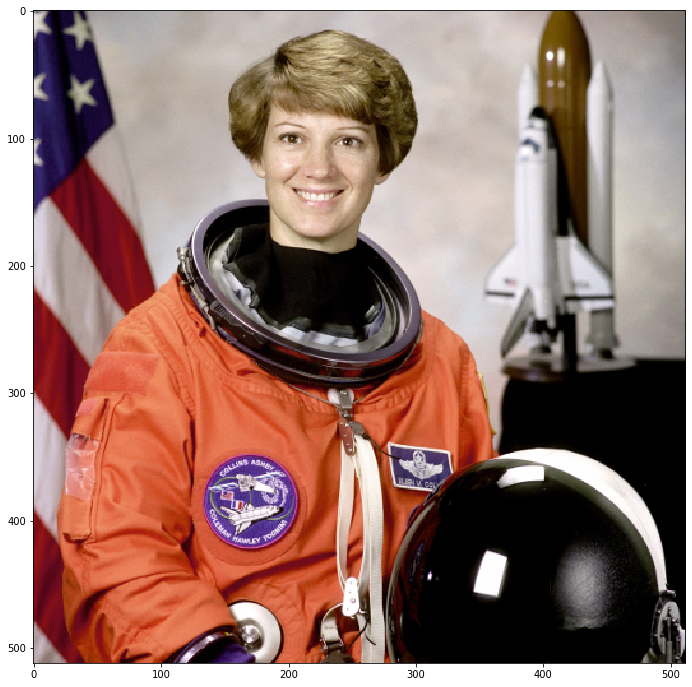

In [7]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [1 Point]

Plot the R, G and B channels separately.

In [8]:
r = np.stack((img[:, :, 0],np.zeros((img.shape[0],img.shape[1])),np.zeros((img.shape[0],img.shape[1]))),axis=-1)
g = np.stack((np.zeros((img.shape[0],img.shape[1])),img[:, :, 1],np.zeros((img.shape[0],img.shape[1]))),axis=-1)
b = np.stack((np.zeros((img.shape[0],img.shape[1])),np.zeros((img.shape[0],img.shape[1])),img[:, :, 2]),axis=-1)

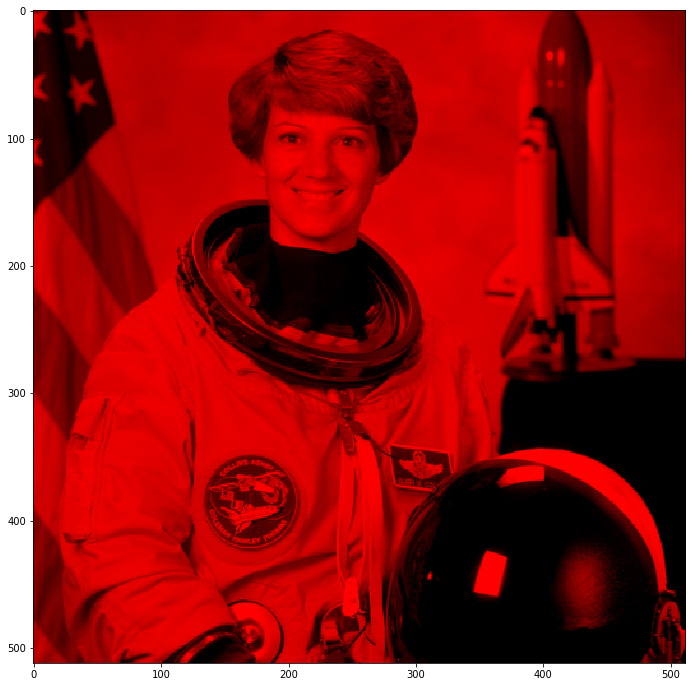

In [9]:
plt.imshow(r)

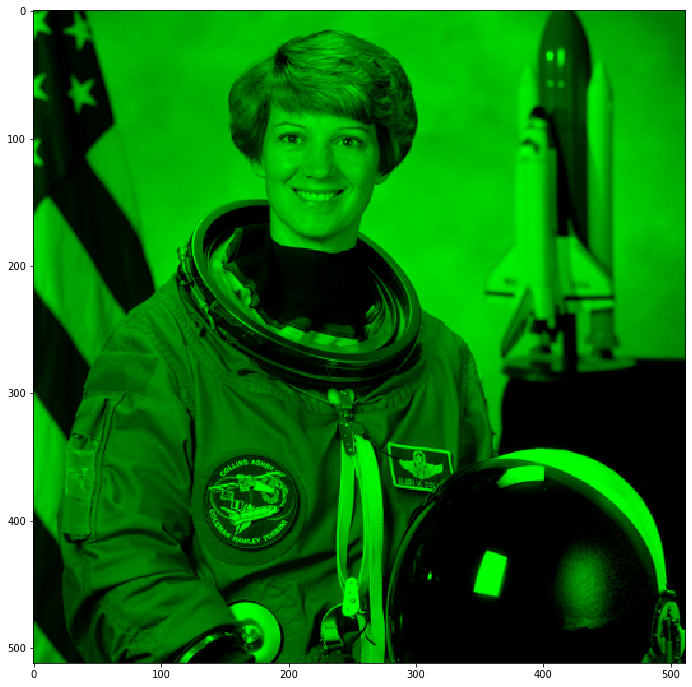

In [10]:
plt.imshow(g)

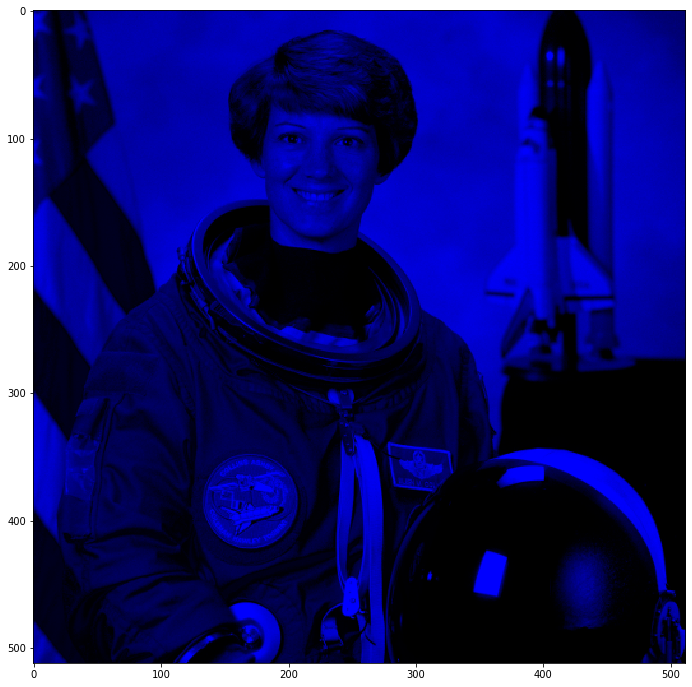

In [11]:
plt.imshow(b)

## Exercise 2 - RGB to HSV [6 Points]

Implement the `rgb_to_hsv` and `hsv_to_rgb` functions. Don't use any color conversion functions from a library.


0.6509803921568628
[0.65098039 0.62745098 0.63137255]


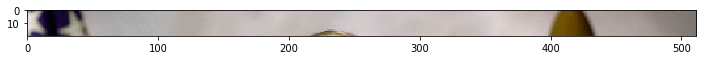

In [12]:
R,G,B = np.reshape(img,(512*512,3))[50]
print(R)
print(img[0][50])
plt.imshow(img[0:20,:])

In [13]:
int(15/7)

2

In [14]:
def calc_H(values):
    R,G,B = values
    img_max = np.max(values)
    img_min = np.min(values)
    if img_min == img_max : H = 0 
    if img_max == R : H = 60 * (0+((G-B)/(img_max-img_min)))
    if img_max == G : H = 60 * (2+((B-R)/(img_max-img_min))) 
    if img_max == B : H = 60 * (4+((R-G)/(img_max-img_min))) 
    if H < 0 : H = H + 360 
    return H/360

In [15]:
def rgb_to_hsv(rgb_image):
    """
    Converts the numpy array `x` from RGB to the HSV. 
    """
    x_shape = rgb_image.shape[1]
    y_shape = rgb_image.shape[0]
    
    hsv_image = np.zeros((y_shape,x_shape,3))
    cnt = 0
    for values in np.reshape(rgb_image,(y_shape*x_shape,3)):
        x_coord = int(cnt % x_shape)
        y_coord = int(cnt/y_shape)
        H = calc_H(values)
        if np.max(values) == 0: S = 0  
        else: S = (np.max(values)-np.min(values))/np.max(values)
        V = np.max(values)
        hsv_image[y_coord][x_coord] = np.array([H,S,V])
        cnt += 1
    return hsv_image

In [17]:
def hsv_to_rgb(hsv_image):
    """
    Converts the numpy array `x` from HSV to the RGB. 
    """
    x_shape = hsv_image.shape[1]
    y_shape = hsv_image.shape[0]
    
    rgb_image = np.zeros((y_shape,x_shape,3))
    cnt = 0
    for values in np.reshape(hsv_image,(y_shape*x_shape,3)):
        x_coord = int(cnt % x_shape)
        y_coord = int(cnt/y_shape)
        H,S,V = values
        C = V*S
        X = C * (1-abs((((H/(60/360))%2)-1)))
        m = V-C
        R,G,B = 0,0,0
        if H >= (0/360) and H < (60/360):
            R,G,B = C,X,0
        if H >= (60/360) and H < (120/360):
            R,G,B = X,C,0
        if H >= (120/360) and H < (180/360):
            R,G,B = 0,C,X
        if H >= (180/360) and H < (240/360):
            R,G,B = 0,X,C
        if H >= (240/360) and H < (300/360):
            R,G,B = X,0,C
        if H >= (300/360) and H < (360/360):
            R,G,B = C,0,X
            
    
        rgb_image[y_coord][x_coord] = np.array([R+m,G+m,B+m])
        cnt += 1

    return rgb_image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


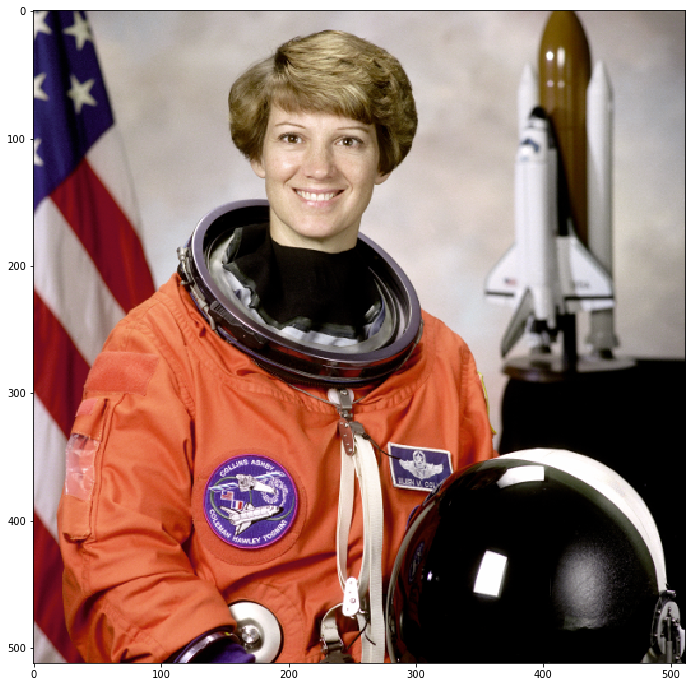

In [18]:
plt.imshow(hsv_to_rgb(rgb_to_hsv(img)))

Plot the saturation of the astronaut image

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


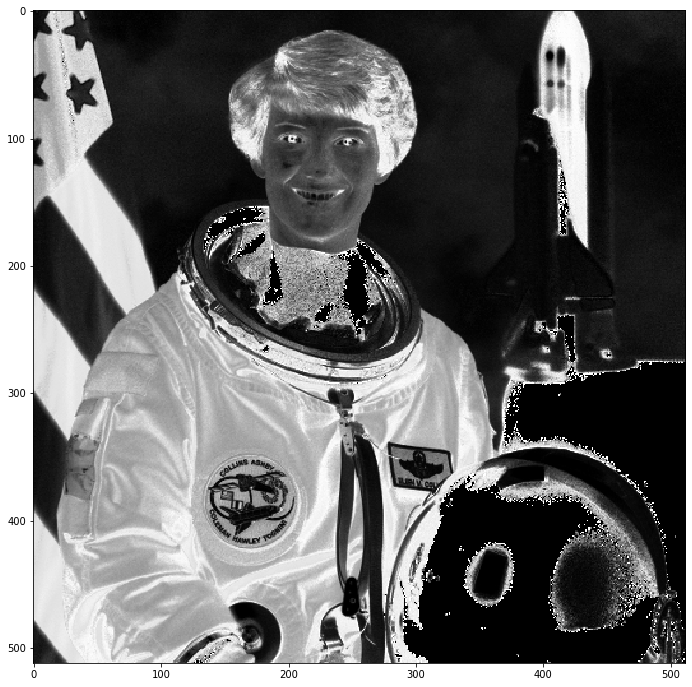

In [19]:
img_as_hsv = rgb_to_hsv(img)
S = img_as_hsv[:, :, 1]
plt.imshow(S,cmap='gray')

Increase the saturation by a factor of 2, convert it back to RGB and plot the result.

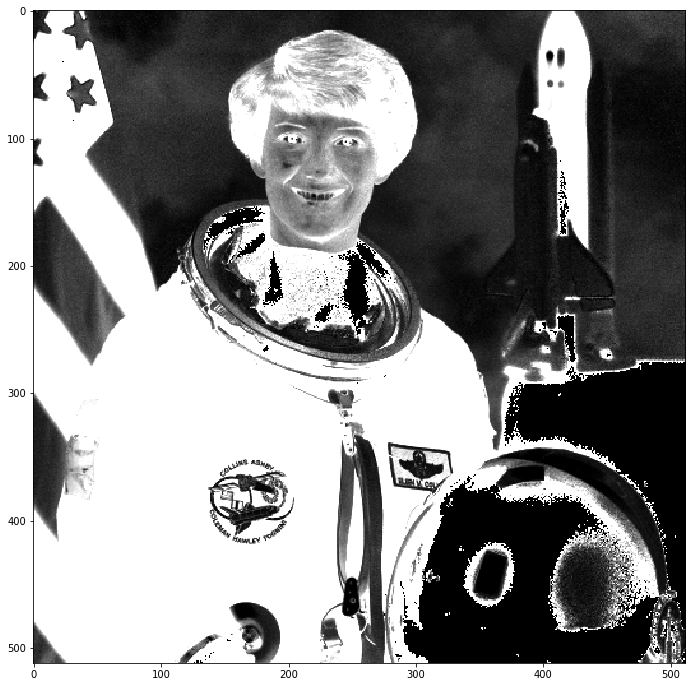

In [20]:
S_doubled = np.clip(S*2,0,1)
plt.imshow(S_doubled,cmap='gray')

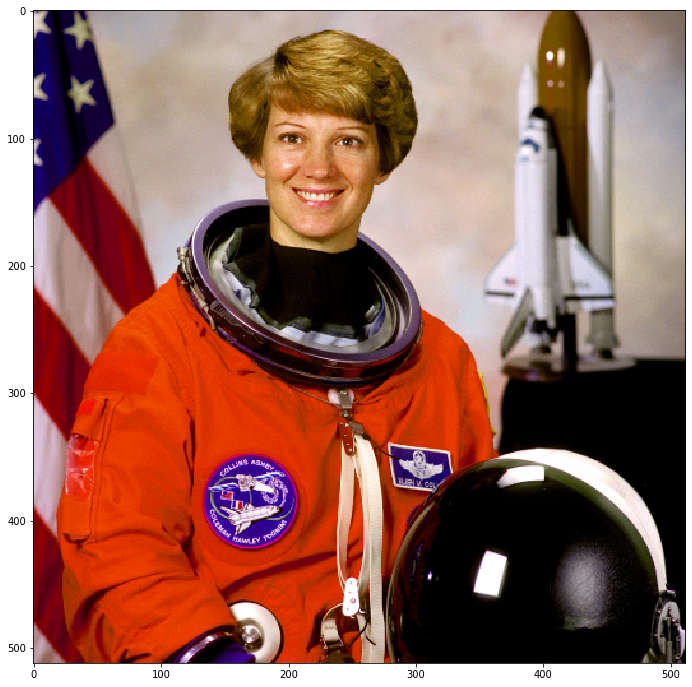

In [21]:
img_as_hsv[:, :, 1] = S_doubled
plt.imshow(hsv_to_rgb(img_as_hsv))

## Exercise 3 - Calculation [2 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.
![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)`
* `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?


In [26]:
b21 = 1/0.17697
m = np.array([[0.49,0.31,0.2],[0.17697,0.8124,0.01063],[0,0.01,0.99]])
RGB1 = np.array([0,0.5,0.5])
XYZ1 = b21 * m.dot(RGB1)
print(XYZ1)
RGB2 = np.array([0.33,0.33,0.33])
XYZ2 = b21 * m.dot(RGB2)
print(XYZ2)

[1.44092219 2.32533763 2.82533763]
[1.86472283 1.86472283 1.86472283]
